<a href="https://colab.research.google.com/github/mferreira-7/weather-app/blob/main/Heart_Disease_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload the zipped data
from google.colab import files
uploaded = files.upload()

In [ ]:
#Unzip the data
from zipfile import ZipFile

file_name = "HeartDataCE101.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#View the table (Read the data)
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Rename the columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#View the summary of statistics of numeric columns
df.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#View the data types, missing values and more
df.info()

print()
print('Shape of the dataset')
print('Number of Features: {}'.format(df.shape[1]))
print('Number of Observations: {}'.format(df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
# Check number of missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

In [ ]:
#Pie chart for Condition ratio (Condition: 0 = Benign, 1 = Malignant)
def condition_ratio(data):

    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values, marker={'colors':colors, 'line':{'color': 'Black', 'width': 3.5}})

    py.iplot([fig_pie])
    return py


condition_ratio(df);

In [ ]:
#Pie chart for Sex ratio (Sex: 0 = Female, 1 = Male)
def sex_ratio(data):

    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values, marker={'colors':colors, 'line':{'color': 'Black', 'width': 3.5}})


    py.iplot([fig_pie])
    return py


sex_ratio(df);


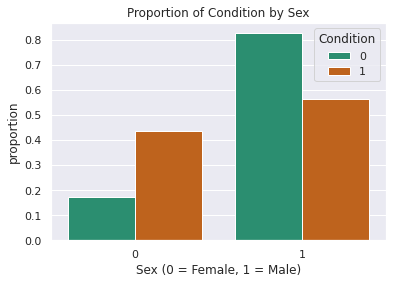

The proportion of Malignant by Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
#Bar chart for the proportion of each sex that is each condition
def condition_proportion_sex(data):

    #Bivariate analysis: Sex vs. Condition
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition by Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()

    #female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    #male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant by Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')


condition_proportion_sex(df);

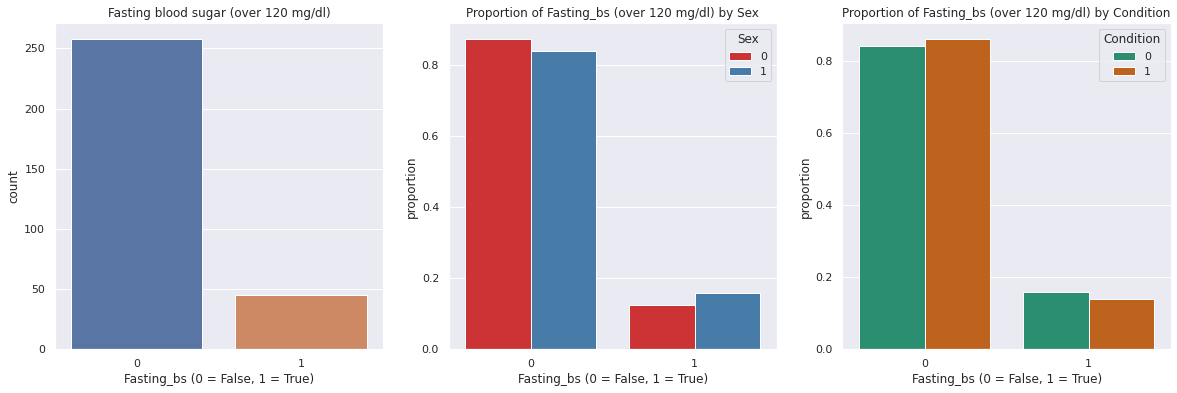

In [ ]:
#Bar chart for fasting blood sugar
def risk_factors_fbs(data):

    fig = plt.figure(figsize=(20, 6))

    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) by Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # Fasting blood sugar for Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) by Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df);

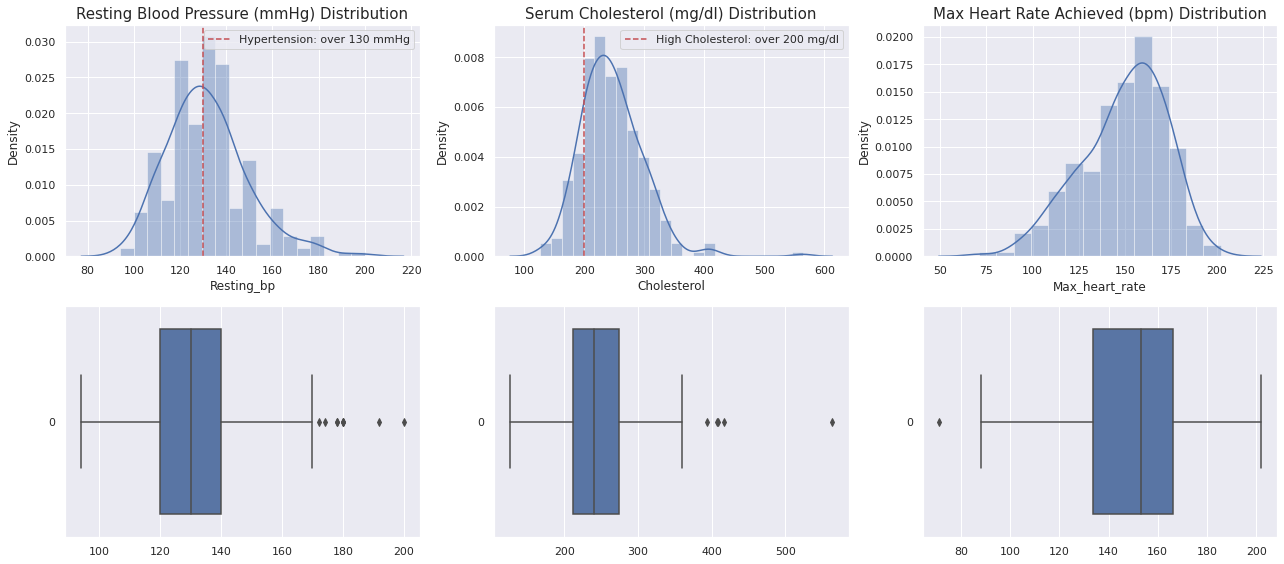

In [ ]:
#Show distributions of risk factors: Resting_bp, Cholesterol, and Max_heart_rate
def risk_factors_dist(data):

    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(data['Resting_bp'])
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')


    # Serum cholesterol
    plt.subplot(2, 3, 2)
    sns.distplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')


    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()


risk_factors_dist(df);

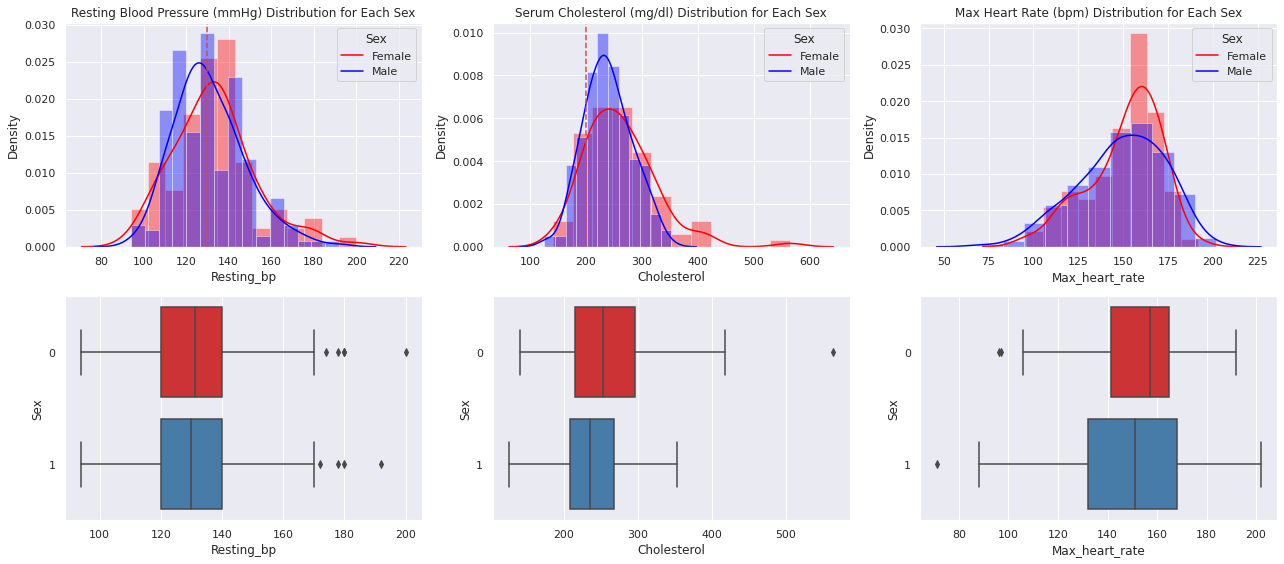

In [ ]:
 #Show distributions of each risk factor by sex
 def risk_factors_dist_sex(data):

    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.distplot(trestbps_female, color='Red')
    sns.distplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'], palette='Set1', orient='h')



    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')


    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.distplot(thalach_female, color='Red')
    sns.distplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'], palette='Set1', orient='h')


    plt.tight_layout()
    plt.show()


risk_factors_dist_sex(df);

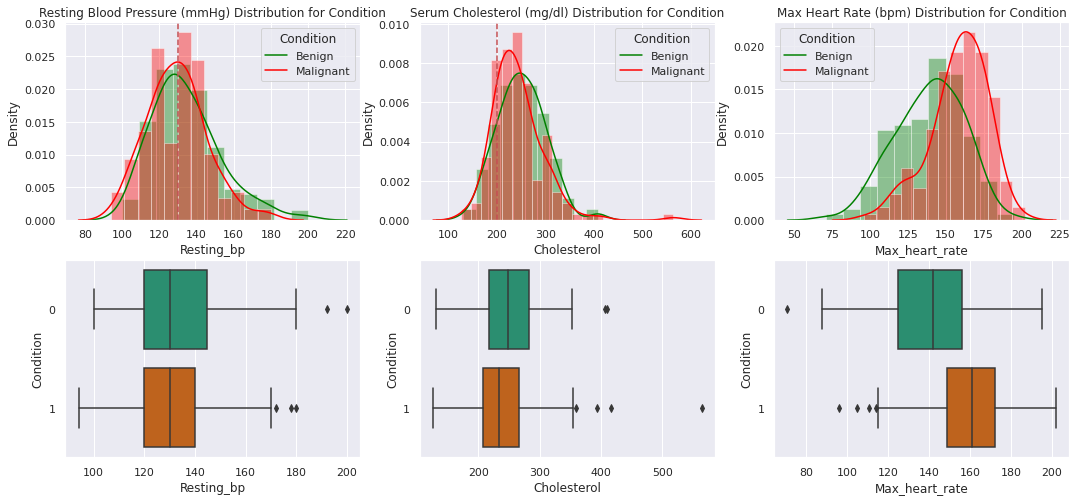

In [ ]:
#Show distributions of risk factors for each condition
def risk_factors_dist_condition(data):

    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.distplot(trestbps_b, color='Green')
    sns.distplot(trestbps_m, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'], orient='h', palette='Dark2')



    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.distplot(chol_b, color='Green')
    sns.distplot(chol_m, color='Red')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'], orient='h', palette='Dark2')



    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'], orient='h', palette='Dark2')



risk_factors_dist_condition(df);

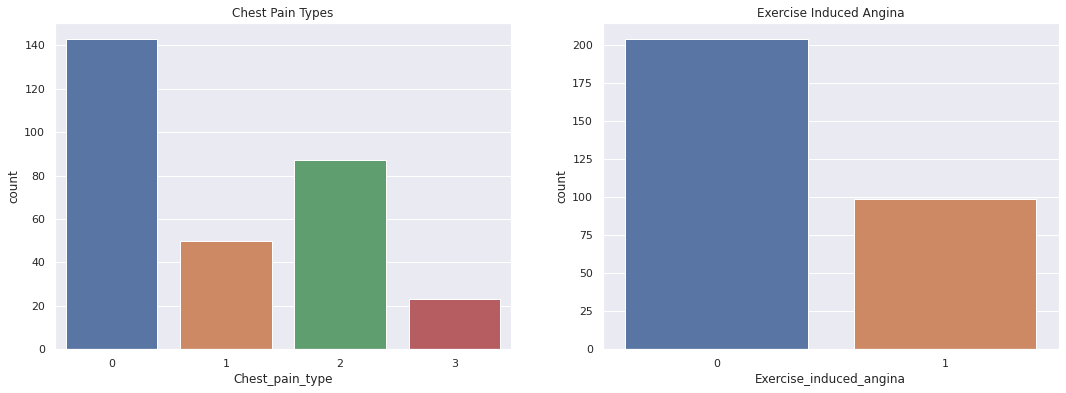

In [ ]:
#Count the number of Chest_pain_type and Exercise_induced_angina values.
def symptoms_features(data):

    plt.figure(figsize=(18, 6))

    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

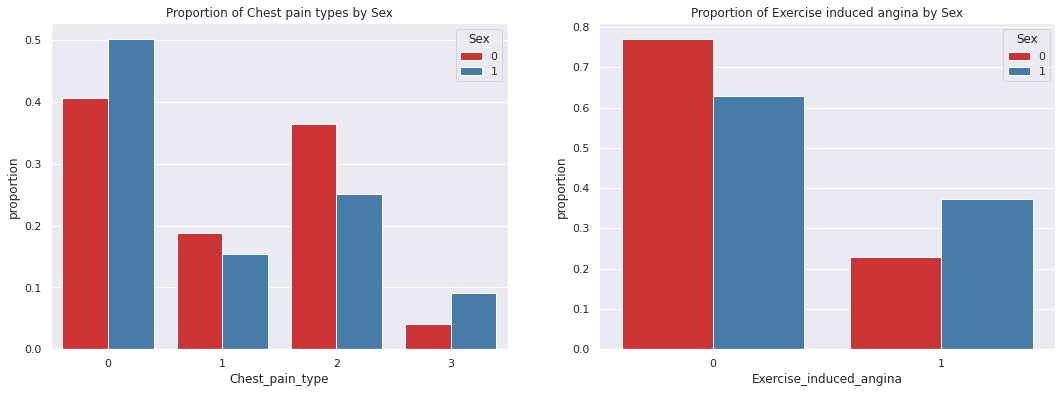

In [ ]:
#Plot bar charts of chest pain type and exercise induced angina by Sex.
def symptoms_features_sex(data):

    fig = plt.figure(figsize=(18, 6))

    # Chest pain types by Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Chest pain types by Sex')


    # Exercise induced angina by Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Exercise induced angina by Sex')
    plt.show()


symptoms_features_sex(df);

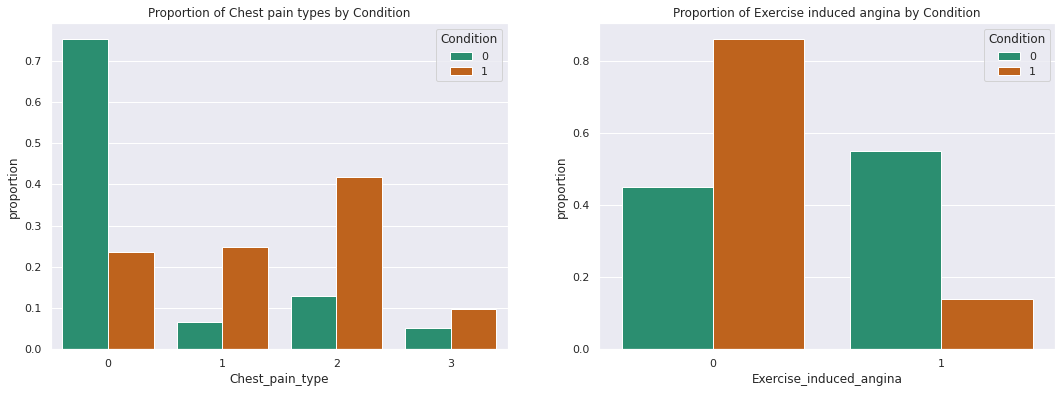

In [ ]:
#Plot bar charts of chest pain type and exercise induced angina by Condition.
def symptoms_features_condition(data):

    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Chest pain types by Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Exercise induced angina by Condition')
    plt.show()


symptoms_features_condition(df);

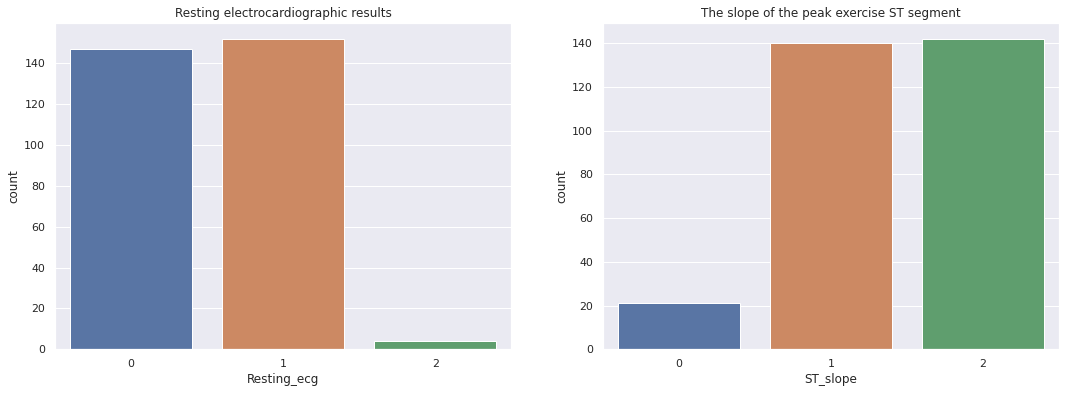

In [ ]:
#Make a bar chart of Resting_ecg and ST_slope.
def heart_functions(data):

    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()


heart_functions(df);

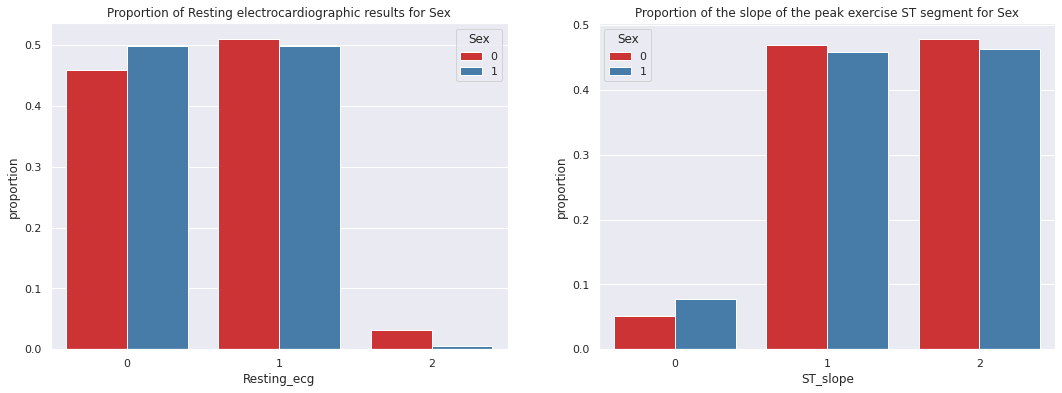

In [ ]:
#Plot the proportion of Resting_exc and ST_slope for Sex.
def heart_functions_sex(data):

    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);

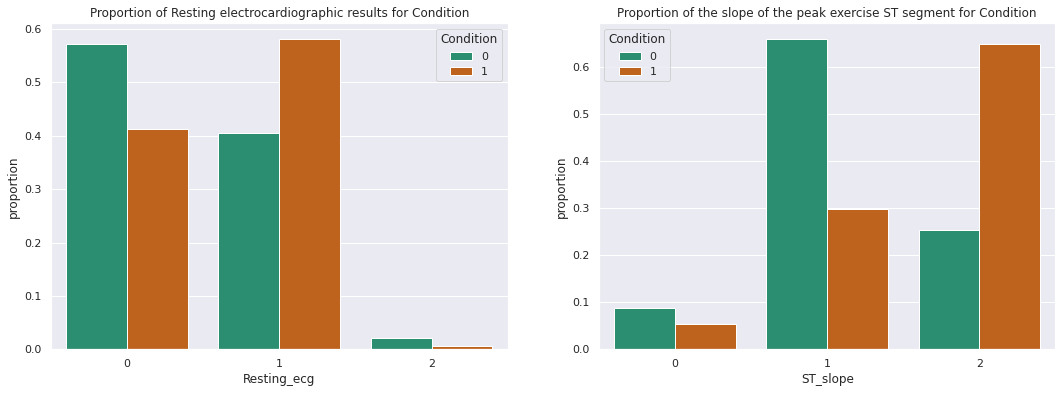

In [ ]:
#Plot the proportion of Resting_exc and ST_slope for Condition.
def heart_functions_condition(data):

    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')


    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_condition(df);

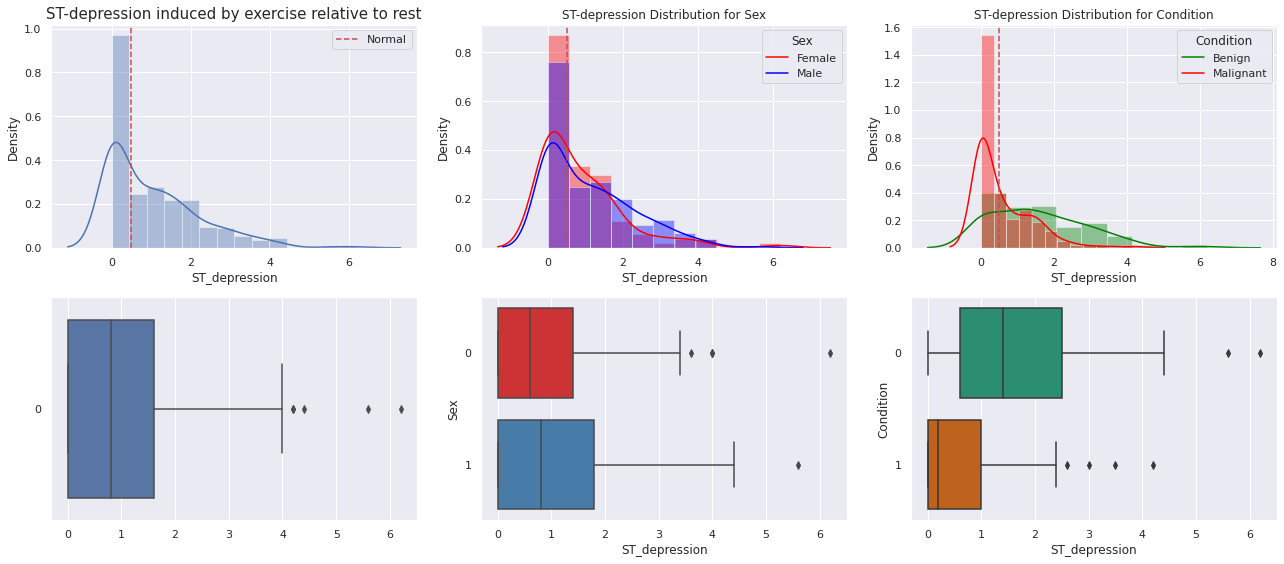

In [ ]:
#Make a standard distribution of ST_depression and distributions for Sex and Condition.
def heart_functions_sex(data):

    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='Red')
    sns.distplot(chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()


heart_functions_sex(df);

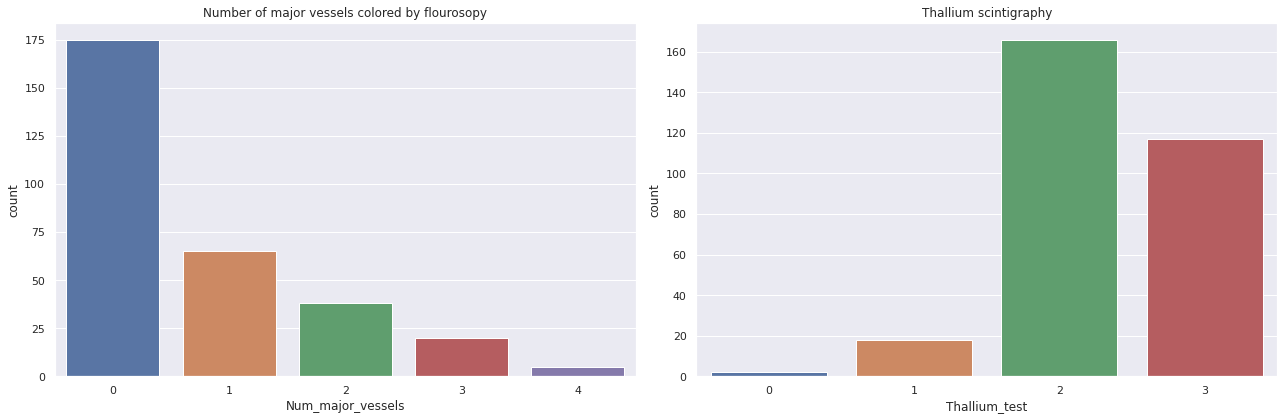

In [ ]:
#EDA with numeric variables
def heart_functions2(data):

    fig = plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Thallium scintigraphy')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

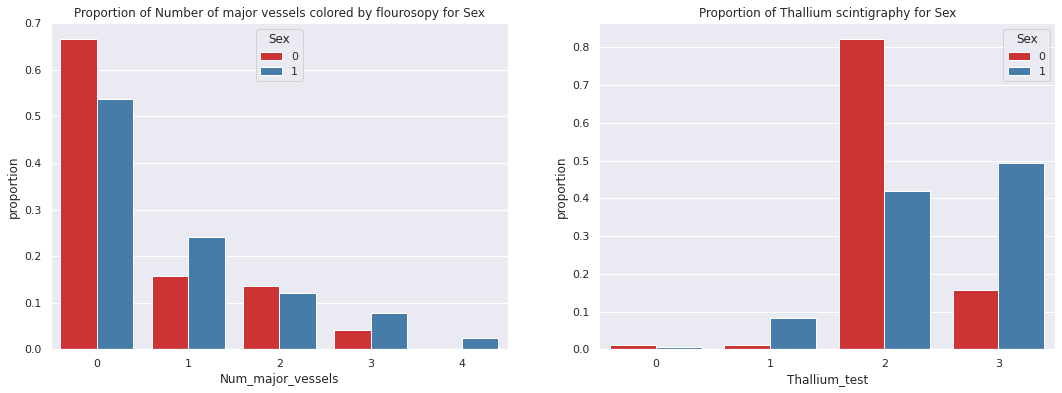

In [ ]:
#Plot proportions of Num_major_vessels and Thallium_test for Sex.
def heart_functions2_sex(data):

    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

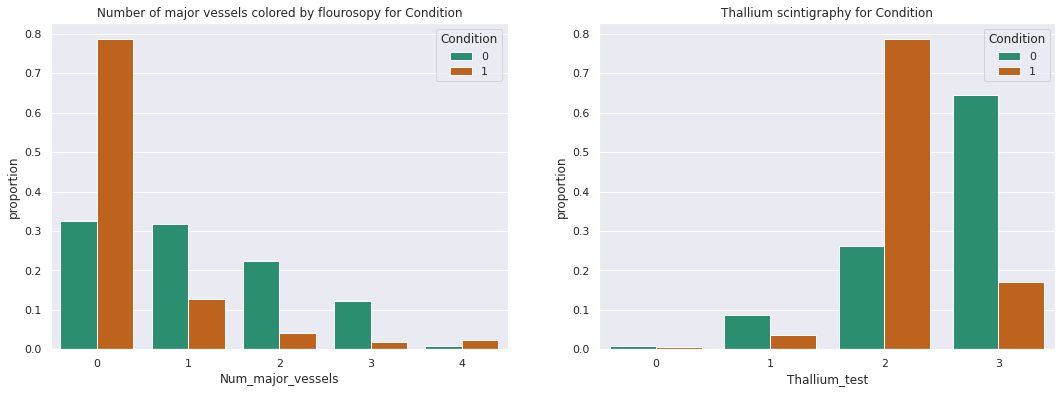

In [ ]:
#Plot proportions of Num_major_vessels and Thallium_test for Condition.
def heart_functions2_condition(data):

    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);

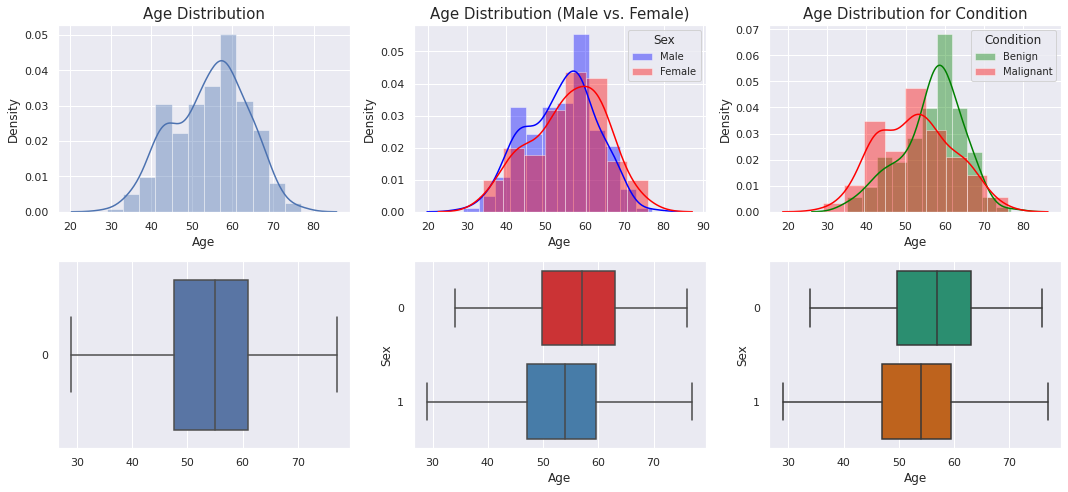

In [ ]:
#Make a standard distribution and distributions for Sex
def age_distribution(data):

    fig = plt.figure(figsize=(15, 7))

    # Age distribution
    plt.subplot(2, 3, 1)
    sns.distplot(data['Age'])
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Age distribution for sex
    plt.subplot(2, 3, 2)
    female = df[df['Sex']==0]['Age']
    male = df[df['Sex']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df[df['Condition']==0]['Age']
    malignant = df[df['Condition']==1]['Age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)

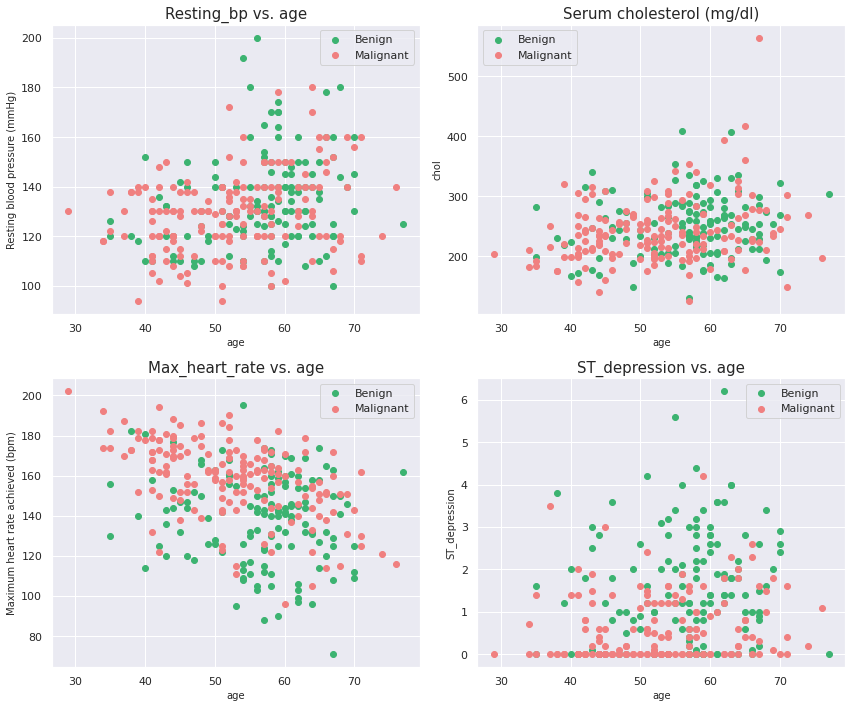

In [ ]:
#Effects of features for heart disease by age
def numeric_features_vs_age(data):

    benign = data.Condition==0
    malignant = data.Condition==1

    age_benign = data.Age[benign]
    age_malignant = data.Age[malignant]

    b_color = 'MediumSeaGreen'
    m_color = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Resting blood pressure (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.Resting_bp[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Resting_bp[malignant], color=m_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)


    # Serum Cholesterol (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.Cholesterol[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Cholesterol[malignant], color=m_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)


    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.Max_heart_rate[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.Max_heart_rate[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)


    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)

    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);

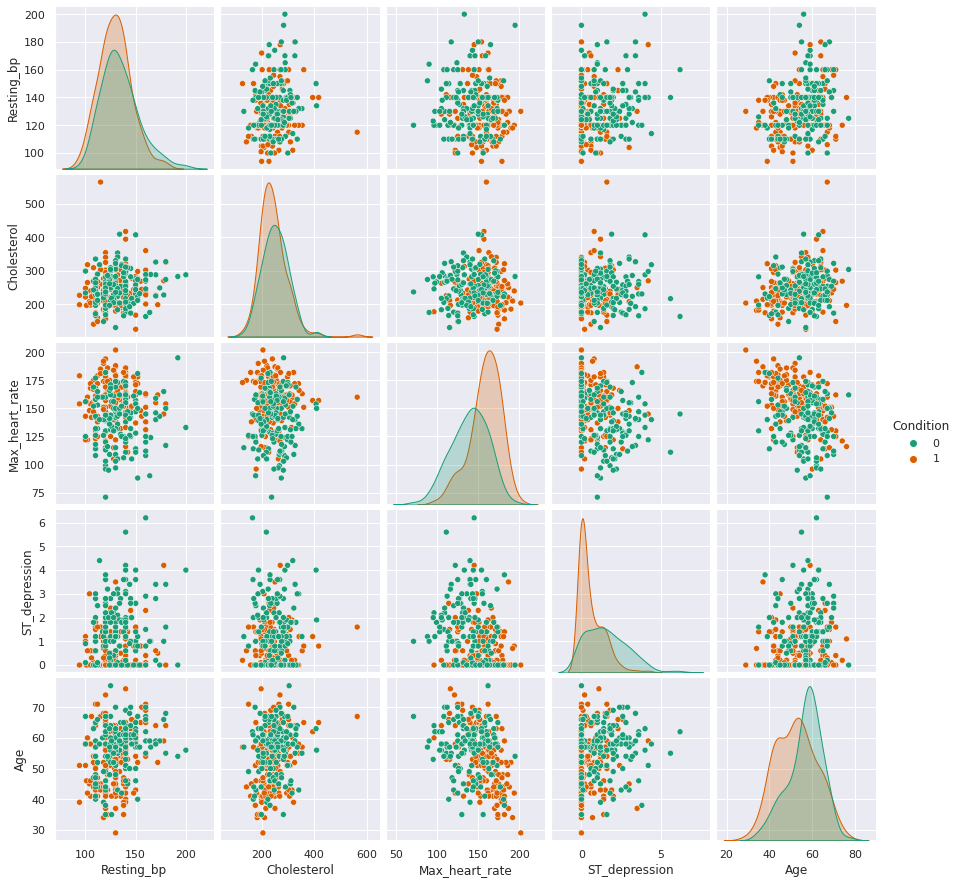

In [ ]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

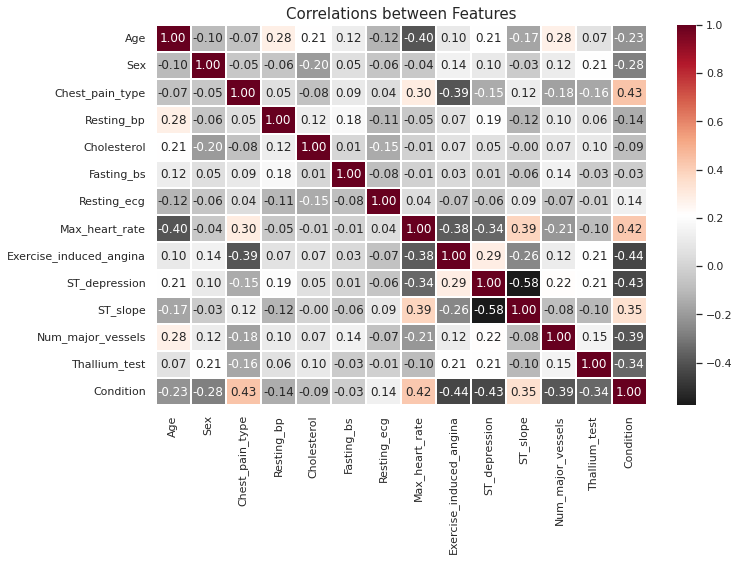

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()


correlation_heatmap(df);

In [ ]:
pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Split data into training, validation and testing sets
from sklearn.model_selection import train_test_split
import fast_ml
from fast_ml.model_development import train_valid_test_split

#testing data is 20% of the whole dataset
main_data, testing_data = train_test_split(df, test_size = 0.2, random_state=25)
training_data, validation_data = train_test_split(main_data, test_size = 0.2, random_state=25)

print("Dataset = {} values".format(len(df)))
print("Training Set = {} values".format(len(training_data)))
print("Validation Set = {} values".format(len(validation_data)))
print("Testing Set = {} values".format(len(testing_data)))

Dataset = 303 values
Training Set = 193 values
Validation Set = 49 values
Testing Set = 61 values


In [ ]:
#X = df.drop(columns = ['Condition']).copy() #Table without the Condition column
#y = df['Condition']  #Only the condition column (this is my target variable)

In [ ]:
#Create the X and y sets by specifying my target variable
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Condition', train_size=0.7, valid_size=0.15, test_size=0.15)
print("Training")
print(X_train.shape)
print(y_train.shape)
print()
print("Validation")
print(X_valid.shape)
print(y_valid.shape)
print()
print("Testing")
print(X_test.shape)
print(y_test.shape)

Training
(212, 13)
(212,)

Validation
(45, 13)
(45,)

Testing
(46, 13)
(46,)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#Train the LR model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict using the LR model
lr.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
#Evaluate the LR model using the validation sets
acc = lr.score(X_valid, y_valid)
acc

0.8888888888888888

In [ ]:
#GridSearch for the best values
from sklearn.model_selection import GridSearchCV

p_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

gridsearch = GridSearchCV(lr, param_grid = p_grid)
bestgs = gridsearch.fit(X_valid,y_valid)

print(" Results from Grid Search " )
print("\n The best parameters across all searched params:\n",bestgs.best_params_)
print("\n The best score across all searched params:\n",bestgs.best_score_)
print("\n This shows a disparity of:\n {}".format(max(bestgs.best_score_,acc) - min(bestgs.best_score_,acc)))

 Results from Grid Search 

 The best parameters across all searched params:
 {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

 The best score across all searched params:
 0.8444444444444444

 This shows a disparity of:
 0.0444444444444444


In [ ]:
log = LogisticRegression(penalty = 'l1', C=  3792.0, max_iter =  100, solver = 'liblinear')
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print("Accuracy:", log.score(X_test, y_test))

Accuracy: 0.8695652173913043
